In [1]:
#knižnica pre dátovú analýzu, manipuláciu s datasetmy a dátami
import pandas as pd

#knižnice pre vykreslovaie informácie vo forme štatistických grafov
import seaborn as sns
import matplotlib.pyplot as plt

#modul ktory dokáže rozdeliť dáta na náhodné testovacie a trénovacie podmnožiny
from sklearn.model_selection import train_test_split

#štandardizuje dáta odstránením priemeru a zmení ich podľa odchýlky dát 
from sklearn.preprocessing import StandardScaler

#knižnica pre vytváranie neurónových sietí
import keras

#modul pre prácu so sekvenčným modelom, definovaný ako lineárna postupnosť vrstiev  
from keras.models import Sequential

#označenie pravidelnej hlboko spojenej vrstvy pre neurónové siete, najčastejšie využívaná vrstva v kerase
from keras.layers import Dense

#funkcia, ktorá konvertuje vektor integerov na binárnu triedu
from keras.utils import to_categorical

In [2]:
#Načítanie datasetu za pomoci knižnice pandas a tam funkcie read_csv
Dataset = pd.read_csv('ks_projects_2018.csv')

In [3]:
#Zobrazenie prvých 10 záznamov datasetu aby som preštudoval zloženie datasetu podľa slpcou a hodnôt v riadkoch
Dataset.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
#Zobrazenie posledných 10 záznamov datasetu aby som preštudoval zloženie datasetu podľa slpcou a hodnôt v riadkoch
Dataset.tail(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.0,successful,78,CA,5019.92,4983.69,4529.81
378652,999971898,Beach Wrestling Documentary,Documentary,Film & Video,NOK,2015-04-28,20000.0,2015-03-29 21:30:33,21500.0,successful,36,NO,2698.97,2875.83,2675.19
378653,999972264,Islanda,Documentary,Film & Video,USD,2012-03-16,1700.0,2012-02-15 04:31:10,25.0,failed,1,US,25.00,25.00,1700.00
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.00,154.00,6500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.0,canceled,0,CA,0.00,0.00,4949.60
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.00,25.00,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.00,155.00,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.00,20.00,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.00,200.00,15000.00
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.00,524.00,2000.00


In [5]:
#Zobrazenie základných vlastností pre jednotlivé stĺpce
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
#Zobrazenie hodnôt pre sĺpce v ktorých sú číselné hodnoty
Dataset.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
#Keďže sa budem zaoberať rôznimy kategóriami Kikstarter projektov tak som si dal vypísať unikátne hodnoty pre kategorie z datasetu
Dataset.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [8]:
#Číselné zobrazenie kolko záznamov z ktorej kategórie sa nachádza v datasete
Dataset.groupby(['main_category']).size()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
dtype: int64

<AxesSubplot:xlabel='main_category', ylabel='count'>

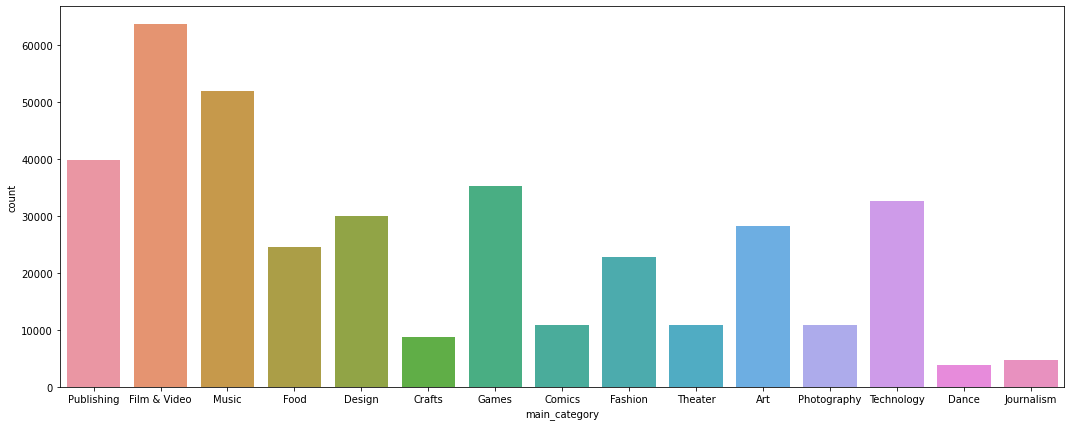

In [9]:
#Grafické zobrazenie kolko záznamov z ktorej kategórie sa nachádza v datasete
# fig,ax = plt.subplots(figsize=(x, y))  pre zmenu velkosti grafu x je pre x ovu os sa roztiahne y pre y ovu os
fig,ax = plt.subplots(figsize=(18, 7))
sns.countplot(x='main_category',ax = ax, data=Dataset)

In [10]:
#Ďalšia premenná z datasetu ktorá nás bude zaujímať je state čiže ako Kikstarter projekt dopadol a preto som vypísal unikátne možnosti
Dataset.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [11]:
#Číselné zobrazenie kolko Kikstarter projektov ako dopadlo
Dataset.groupby(['state']).size()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

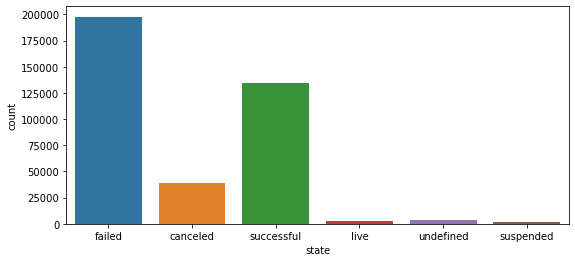

In [12]:
#Grafické zobrazenie kolko Kikstarter projektov ako dopadlo
# fig,ax = plt.subplots(figsize=(x, y))  pre zmenu velkosti grafu x je pre x ovu os sa roztiahne y pre y ovu os
fig,ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='state',data=Dataset)

In [13]:
#V mojom prípade sa zaoberám len stým či dataset uspel = successful alebo nie = failed a preto som vytvoril nový dataset v
#ktorom su zastupene len tieto dva stavy
ClearedDatasetByState = Dataset[Dataset['state'] == 'failed']
ClearedDatasetByState = ClearedDatasetByState.append( Dataset[Dataset['state'] == 'successful'])

In [14]:
#výpis takto zniknutého datasetu
ClearedDatasetByState

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35,FR,66.72,1452.47,1165.70
378644,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.00,6169.00,3500.00
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.02,1732.02,950.00
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78,CA,5019.92,4983.69,4529.81


In [15]:
#prepis uspesnosti zo slovnych hodnout na hodnoty 0,1
ClearedDatasetByState.loc[ClearedDatasetByState.state == "successful", "state"] = 1
ClearedDatasetByState.loc[ClearedDatasetByState.state == "failed", "state"] = 0

In [16]:
#kontroloval som ake Dtype majú jednotlivé stlpce
ClearedDatasetByState.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331675 non-null  int64  
 1   name              331672 non-null  object 
 2   category          331675 non-null  object 
 3   main_category     331675 non-null  object 
 4   currency          331675 non-null  object 
 5   deadline          331675 non-null  object 
 6   goal              331675 non-null  float64
 7   launched          331675 non-null  object 
 8   pledged           331675 non-null  float64
 9   state             331675 non-null  object 
 10  backers           331675 non-null  int64  
 11  country           331675 non-null  object 
 12  usd pledged       331465 non-null  float64
 13  usd_pledged_real  331675 non-null  float64
 14  usd_goal_real     331675 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB


In [17]:
#kedže stlpec state mal Dtype object a podla nej budeme zistovať target hodnoty a tam sú potrebné číselne hodnoty tak za pomoci 
#funkcie astype som pretipoval tento stlpec na int
ClearedDatasetByState.state = ClearedDatasetByState.state.astype(int)
#kontrola či pretipovanie prebehlo v poriadku
ClearedDatasetByState.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331675 non-null  int64  
 1   name              331672 non-null  object 
 2   category          331675 non-null  object 
 3   main_category     331675 non-null  object 
 4   currency          331675 non-null  object 
 5   deadline          331675 non-null  object 
 6   goal              331675 non-null  float64
 7   launched          331675 non-null  object 
 8   pledged           331675 non-null  float64
 9   state             331675 non-null  int32  
 10  backers           331675 non-null  int64  
 11  country           331675 non-null  object 
 12  usd pledged       331465 non-null  float64
 13  usd_pledged_real  331675 non-null  float64
 14  usd_goal_real     331675 non-null  float64
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 39.2+ MB


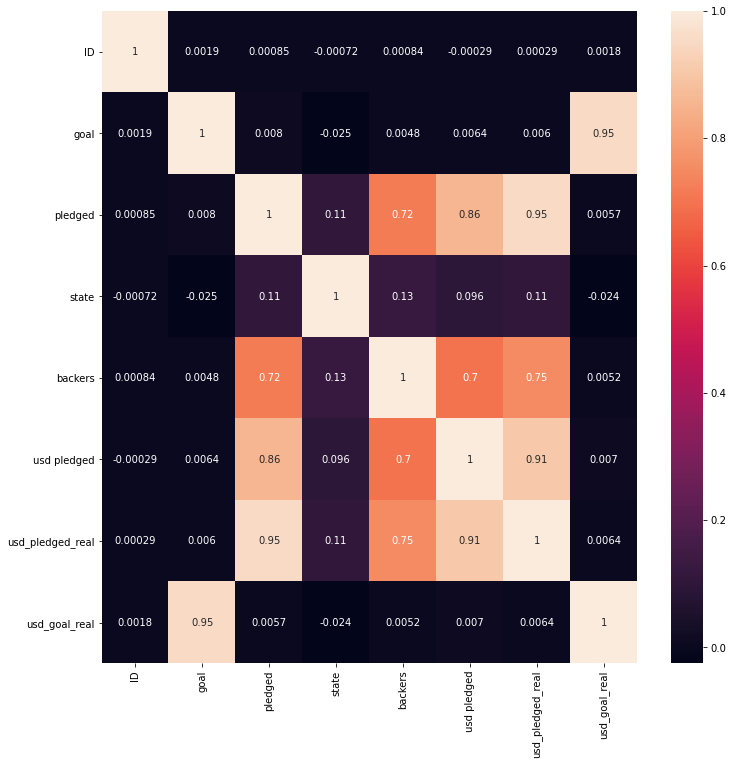

In [18]:
#Vytvoril som korelačný matrix aby som zistil ktoré stlpce navzájom korelujú
corrMatrix = ClearedDatasetByState.corr()
#zmena velkosti stvorcekov
plt.subplots(figsize=(12,12))
#vykreslenie korelacneho matrixu, annot= true aby boli do stvorcekov vpisane hodnoty
sns.heatmap(corrMatrix, annot=True)
#Zobrazenie grafu
plt.show()

In [19]:
#kedze som videl ze s target hodnotou state koreluju hlavne stlpce pledged a backers tak som zacal zistovať hodnoty pre tieto 
#stlpce ako prvé som kategorizoval a zistil priemer pledged pre jednotlivé kategorie Kikstarter projektov
groupByMainCategoryPledged = ClearedDatasetByState.groupby('main_category', as_index=False).pledged.mean()
#pisomne zobrazenie hodnôt
groupByMainCategoryPledged

,main_category,pledged
0,Art,3880.154369
1,Comics,7458.191961
2,Crafts,2203.499028
3,Dance,3861.714159
4,Design,30739.555069
5,Fashion,7246.877147
6,Film & Video,6928.288544
7,Food,5785.955156
8,Games,25982.953092
9,Journalism,3558.400810


<AxesSubplot:xlabel='main_category', ylabel='pledged'>

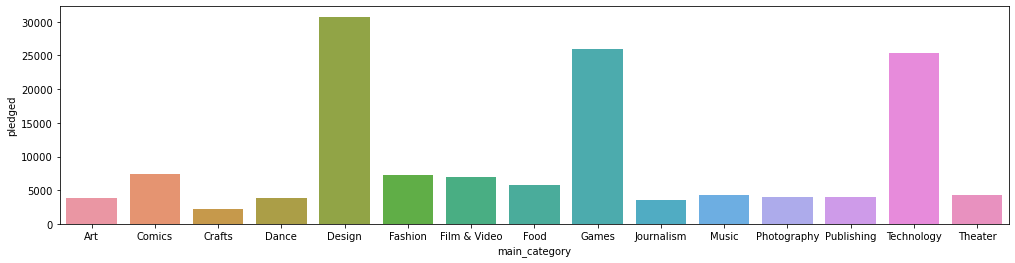

In [20]:
#zmena velkosti grafu
fig,ax = plt.subplots(figsize=(17, 4))
#grafické zobrazenie priemerov jednotlivých kategorii pre pledged
sns.barplot(x='main_category', y = 'pledged',data=groupByMainCategoryPledged)

In [21]:
#zistená kategoria ktorá ma najmenší priemer pledged a výpis hodnoty
groupByMainCategoryPledged[groupByMainCategoryPledged.pledged == groupByMainCategoryPledged.pledged.min()]

,main_category,pledged
2,Crafts,2203.499028


In [22]:
#zistená kategoria ktorá ma najvačši priemer pledged a výpis hodnoty
groupByMainCategoryPledged[groupByMainCategoryPledged.pledged == groupByMainCategoryPledged.pledged.max()]

,main_category,pledged
4,Design,30739.555069


In [23]:
#ako pre pledged tak a pre backers som som zistil priemerne hodnoty pre jednotlive kategorie
groupByMainCategoryBackers = ClearedDatasetByState.groupby('main_category', as_index=False).backers.mean()
groupByMainCategoryBackers

,main_category,backers
0,Art,45.422448
1,Comics,145.608322
2,Crafts,29.851113
3,Dance,44.790372
4,Design,274.141697
5,Fashion,68.449254
6,Film & Video,72.554266
7,Food,58.954158
8,Games,382.103678
9,Journalism,43.057845


<AxesSubplot:xlabel='main_category', ylabel='backers'>

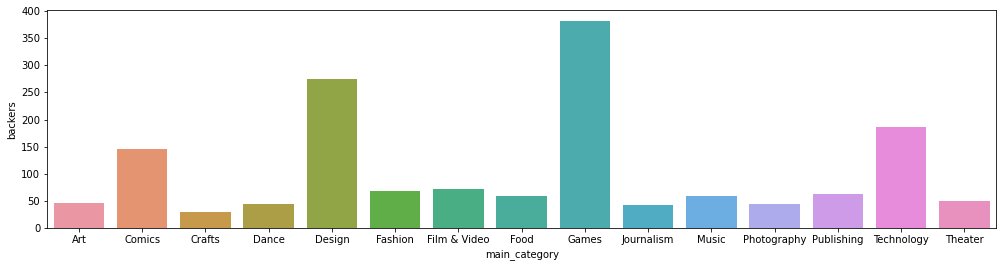

In [24]:
#zmena velkosti grafu
fig,ax = plt.subplots(figsize=(17, 4))
#grafické zobrazenie priemerov jednotlivých kategorii pre pledged
sns.barplot(x='main_category', y = 'backers',data=groupByMainCategoryBackers)

In [25]:
#zistená kategoria ktorá ma najmenší priemer backers a výpis hodnoty
groupByMainCategoryBackers[groupByMainCategoryBackers.backers == groupByMainCategoryBackers.backers.min()]

,main_category,backers
2,Crafts,29.851113


In [26]:
#zistená kategoria ktorá ma najvačši priemer backers a výpis hodnoty
groupByMainCategoryBackers[groupByMainCategoryBackers.backers == groupByMainCategoryBackers.backers.max()]

,main_category,backers
8,Games,382.103678


In [27]:
#utriedenie datasetu podla main_category, ascending usporiadanie vzostupne
ClearedDatasetByState.sort_values(by=['main_category'],ascending=[True], inplace=True)
#vypis
ClearedDatasetByState

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
254240,362797426,LacquerWorks,Art,Art,GBP,2013-08-18,3600.0,2013-07-19 12:17:33,100.0,0,2,GB,151.67,155.45,5596.32
360333,905782189,Get a unicorn bjd pet in resin,Sculpture,Art,USD,2013-09-18,635.0,2013-09-04 00:27:38,702.0,1,10,US,702.00,702.00,635.00
142186,1722500459,Wool to Yarn,Art,Art,USD,2015-04-27,2000.0,2015-04-07 01:55:30,0.0,0,0,US,0.00,0.00,2000.00
243523,308535664,A Bike Rack for Kat.,Public Art,Art,USD,2011-10-01,2000.0,2011-08-02 20:49:51,2179.0,1,61,US,2179.00,2179.00,2000.00
46521,1236692953,Painted Drum Gatherings,Painting,Art,USD,2017-01-16,3000.0,2016-12-17 21:21:49,0.0,0,0,US,0.00,0.00,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249150,337247174,Here Comes the Train! CD,Musical,Theater,CAD,2016-01-02,3000.0,2015-11-12 21:46:20,900.0,0,9,CA,679.30,638.03,2126.75
249167,337307800,When Jazz Had the Blues,Musical,Theater,USD,2017-02-01,60000.0,2016-12-09 02:35:30,285.0,0,5,US,235.00,285.00,60000.00
249265,337875406,Not making potato salad here!,Plays,Theater,CAD,2014-11-20,300.0,2014-11-05 23:58:45,0.0,0,0,CA,0.00,0.00,266.43
248696,33480466,BELIEF on the Isle of Skye,Plays,Theater,USD,2015-08-20,12000.0,2015-07-07 23:44:12,2800.0,0,29,US,2800.00,2800.00,12000.00


In [28]:
#funkcia ktora bude vracat tú časť už znameho datasetu ktorá zodpoveda tej kategorie Kikstarter projektov o ktorom budeme predikcia
def SetDataset(categoria):
    dataset = ClearedDatasetByState[(ClearedDatasetByState['main_category'] == categoria)]
    return dataset


In [29]:
#výpis možných kategorii kde môžu byť zaradené projekty
print('Možné kategórie pre tvoj Kickstarter projekt.')
for name in ClearedDatasetByState.main_category.unique():
    print (name, end = ", ")

Možné kategórie pre tvoj Kickstarter projekt.
Art, Comics, Crafts, Dance, Design, Fashion, Film & Video, Food, Games, Journalism, Music, Photography, Publishing, Technology, Theater, 

In [30]:
#nacitanie kategorie pomocou input
categoria = input('Zadaj kategóriu pre tvoj Kickstarter projekt: ')
#nastavenie datasetu pre predikciu podľa zadanej kategorie za pomoci volanej funkcie SetDataset
dataset_pre_predikciu = SetDataset(categoria)

Zadaj kategóriu pre tvoj Kickstarter projekt: Dance


In [31]:
#Vypis datasetu ktorú na ktorej budeme robiť predikciu
dataset_pre_predikciu

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169660,1863139290,O2 The Dance Company presents: Between the Bra...,Dance,Dance,CAD,2015-04-01,15000.0,2015-02-27 04:06:14,15080.0,1,34,CA,12076.73,11926.61,11863.33
28360,114384906,The Order: 2012 Dance Iquail Season,Dance,Dance,USD,2011-12-16,3000.0,2011-11-01 02:21:41,4700.0,1,76,US,4700.00,4700.00,3000.00
275835,473466205,Desert Dance Short Film,Performances,Dance,USD,2017-08-10,3500.0,2017-07-16 05:53:59,4297.0,1,73,US,450.00,4297.00,3500.00
202010,2028642880,Livsgnist - Av menn for menn,Dance,Dance,NOK,2016-01-31,50000.0,2015-12-18 16:51:24,150.0,0,3,NO,17.04,17.56,5854.80
36912,1187206867,APPARATUS,Performances,Dance,USD,2014-07-03,5000.0,2014-06-04 22:24:57,5066.0,1,82,US,5066.00,5066.00,5000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237468,27715773,Inter Pares Project's autumn residency at Danc...,Residencies,Dance,GBP,2017-10-02,1000.0,2017-09-07 17:03:48,1003.0,1,23,GB,117.30,1311.45,1307.53
100661,1511229264,Metro Tap Roots,Dance,Dance,USD,2015-08-19,5000.0,2015-07-20 18:32:19,6174.0,1,53,US,6174.00,6174.00,5000.00
107370,1545840573,The Problem of Pain,Dance,Dance,USD,2012-09-29,700.0,2012-09-06 22:19:05,710.0,1,5,US,710.00,710.00,700.00
78538,1399581329,Fuego Latin Dance High School Competition,Performances,Dance,USD,2016-09-19,100000.0,2016-07-21 15:53:22,3395.0,0,12,US,102.00,3395.00,100000.00


<AxesSubplot:title={'center':'Vydaril sa Kickstarter projekt \n 0: Nie | 1: Ano '}, ylabel='state'>

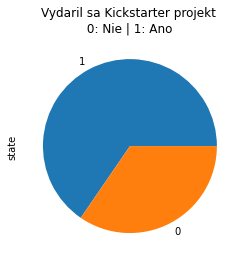

In [32]:
#vykreslenie kolacoveho grafu pre zobrazenie v akom pomere boli uspesne projekty v danej kategorii
dataset_pre_predikciu['state'].value_counts().plot(kind = 'pie', title='Vydaril sa Kickstarter projekt \n 0: Nie | 1: Ano ')

In [33]:
#percentuálne vyjadrenie uspesnosti projektov
(dataset_pre_predikciu['state'].value_counts()/sum(dataset_pre_predikciu['state'].value_counts()))*100

1    65.435209
0    34.564791
Name: state, dtype: float64

In [34]:
#nazvy stlpcou ktore najviac ovplivnuju uspesnost projektu ( pledged , backers)
stlpce = ['pledged','backers']
#hodnoty za pomoci ktorych sa bedeme snazit predikovat uspesnost
hodnoty_pre_predikciu = dataset_pre_predikciu[stlpce]
#hodnoty ktore odzrkadluju ci projekt bol uspesny alebo nie ( cielova premenna v predikciu)
target_hodnoty = dataset_pre_predikciu["state"]
#X_train, X_test, y_train, y_test premenne sem rozdelime nas náš dataset
#delenie prebehne pomocou funkcie train_test_split, ktora rozdelí dataset na trénovacie a testovacie, hodnoty podla pomeru
#0.2 cize 20% testovacie a 0.8 cize 80% trenovacie hodnoty
#random_state nahodne rozdelenie pri kazdom spusteni
X_train, X_test, y_train, y_test = train_test_split(hodnoty_pre_predikciu, target_hodnoty, test_size = 0.2, random_state = 42)

#StandardScaler zoškáluje hodnoty podla rozptylu podľa rozptylu
sc = StandardScaler()

#fit_transform škálovali trénovacich dát a zapametanie si šklálovacich parametrov
#parametre sa potom využiju pre testovacie data
X_train = sc.fit_transform(X_train)
#tu využijeme zapametane parametre a využijeme pre testovacie dáta
X_test = sc.transform(X_test)

In [35]:
#vytvoríme sekvenčny model pre predikciu
KerasModel = Sequential()


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#sekvenčný model bude mať 5 Dense vrstvy
#model má 1 vstupnú vrstvu,3 skryté vrstvy a 1 výstupnú vrstvu
#prvé číslo pocet neurónov
#input_dim = počet vstupných tried, (pocet stlpcov v hodnote hodnoty_pre_predikciu)
#softmax = aktivačná funkcia ktorá sa využíva sa na konci kategorických pravdepodobností. 
#kategorick=e pravdepodobnosti, výsledné hodnoty sú 0,1 ( ano , nie)

KerasModel.add(Dense(500, activation = 'relu',input_dim=2))
KerasModel.add(Dense(250, activation = 'relu'))
KerasModel.add(Dense(125, activation = 'relu'))
KerasModel.add(Dense(65, activation = 'relu'))
KerasModel.add(Dense(2, activation = 'softmax'))

#metóda compile učenia modelu
#adam = optimalizačná metóda stochastického gradientového zostupu
#categorical_crossentropy = vypočíta stratu pomocou krížovej entropie medzi poskytnutými dátami a predikciami
KerasModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#trenovanie = zacne sa trenovanie na trénovacích množinách a 100 iteráciách (epochach)
trenovanie = KerasModel.fit(X_train, y_train, epochs=100)

KerasModel.summary()

Epoch 1/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8008
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8973
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8839
Epoch 4/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2715 - accuracy: 0.9015
Epoch 5/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8949
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8864
Epoch 7/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8854
Epoch 8/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.8977
Epoch 9/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8956
Epoch 10/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8887
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8948
Epoch 83/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8993
Epoch 84/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.8955
Epoch 85/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8973
Epoch 86/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.9015
Epoch 87/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.8929
Epoch 88/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.8975
Epoch 89/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8917
Epoch 90/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.9044
Epoch 91/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8948
Epoch 92/100


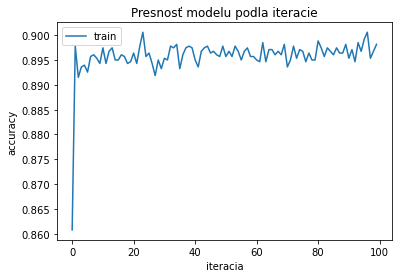

In [36]:
plt.plot(trenovanie.history['accuracy'])
plt.title('Presnosť modelu podla iteracie')
plt.ylabel('accuracy')
plt.xlabel('iteracia')
plt.legend(['train'])
plt.show()

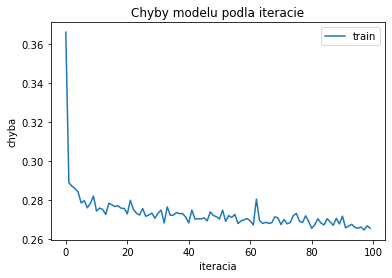

In [37]:
plt.plot(trenovanie.history['loss'])
plt.title('Chyby modelu podla iteracie')
plt.ylabel('chyba')
plt.xlabel('iteracia')
plt.legend(['train'])
plt.show()

In [38]:
#pomocou funkcie predict, predvídame uspech a neuspech projektov z množiny trénovacích dát
predikcia_trainovacie = KerasModel.predict(X_train)
#evaluate do premennej skore uložíme hodnoty
#verbosity = progressbar priebehu 0 false 1 true 
skore_train = KerasModel.evaluate(X_train, y_train, verbose = 0)
#vypis presnosti a chybovosti v percentách
print("Presnosť pri trénovacích dátach:" + str(skore_train[1]*100))
print("Chybovosť pri trénovacích dátach: "+ str((1 - skore_train[1])*100))

Presnosť pri trénovacích dátach:89.88803625106812
Chybovosť pri trénovacích dátach: 10.111963748931885


In [39]:
#pomocou funkcie predict, predvídame uspech a neuspech projektov z množiny testovacich dát
predikcia_testovacia = KerasModel.predict(X_test)
#evaluate do premennej skore uložíme hodnoty
#verbosity = progressbar priebehu 0 false 1 true 
skore_test = KerasModel.evaluate(X_test, y_test, verbose = 0)
#vypis presnosti a chybovosti v percentách
print("Presnosť pri testovacích dátach:" + str(skore_test[1]*100))
print("Chybovosť pri testovacích dátach: "+ str((1 - skore_test[1])*100))

Presnosť pri testovacích dátach:88.67132663726807
Chybovosť pri testovacích dátach: 11.328673362731934


In [40]:
def vratPredikciu(zaujemcovia, podporovatelia):
    dataset = pd.DataFrame({"pledged":int(zaujemcovia), "backers":int(podporovatelia)},index=[0])
    X = sc.transform(dataset)
  
    skore = skore_test[1]*100
    classificationPrediction = KerasModel.predict_classes(X)          
   
    if(classificationPrediction[0]==0):
        return "Kikstarter projekt v kategorii " + categoria + " pri " + zaujemcovia + " zaujemcoch a " + podporovatelia + " podporovateloch neuspeje, na: "+str(round(skore,2))+"%"
    else:
         return "Kikstarter projekt v kategorii " + categoria + " pri " + zaujemcovia + " zaujemcoch a " + podporovatelia + " podporovateloch uspeje, na: "+str(round(skore,2))+"%"

In [41]:
zaujemcovia = input('Zadaj pocet zaujemcov  ku Kikstarter projektu: ')
podporovatelia = input ('Zadaj pocet podporovatelov  ku Kikstarter projektu: ')
vratPredikciu(zaujemcovia, podporovatelia)

Zadaj pocet zaujemcov  ku Kikstarter projektu: 50
Zadaj pocet podporovatelov  ku Kikstarter projektu: 50


D:\Programy\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Kikstarter projekt v kategorii Dance pri 50 zaujemcoch a 50 podporovateloch uspeje, na: 88.67%'